In [ ]:
!pip install -U ultralytics

In [ ]:
!pip install opencv-python

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uWArRjotC0HlqAKNLd1a")
project = rf.workspace("pitthayakorn").project("pitthayakorn")
version = project.version(4)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.61, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to pitthayakorn-4 in yolov8:: 100%|██████████| 614/614 [00:00<00:00, 6525.87it/s]


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
model = YOLO('/yolov8n.pt')

results = model.train(data='/content/pitthayakorn-4/data.yaml', epochs=1000, imgsz=640)

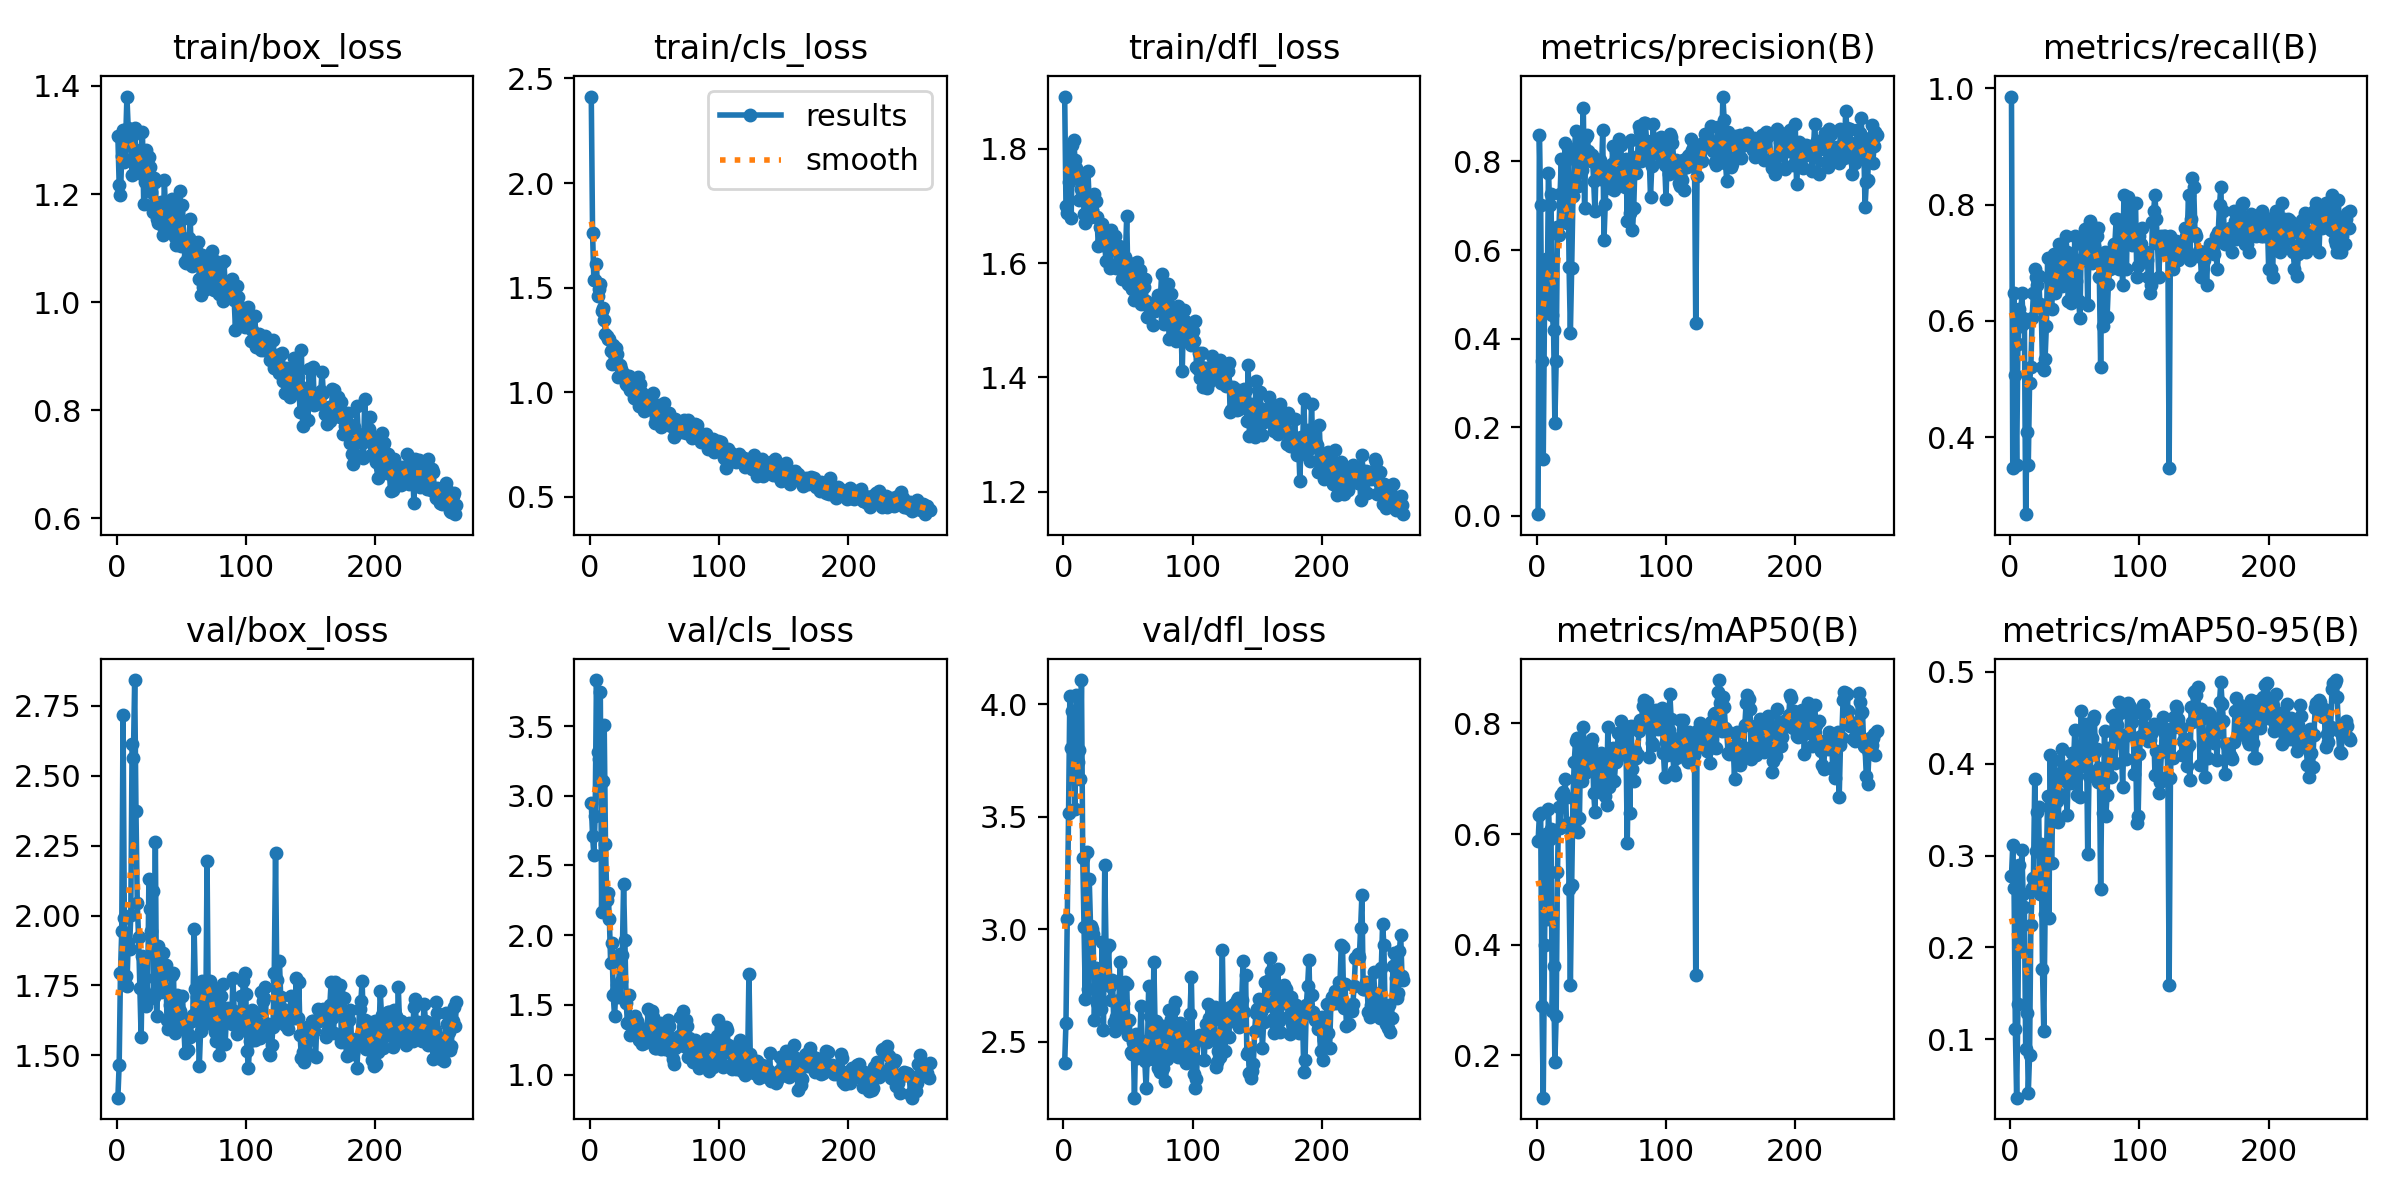

In [ ]:
from IPython.display import display, Image

Image(filename='/content/runs/detect/train3/results.png', width=800)

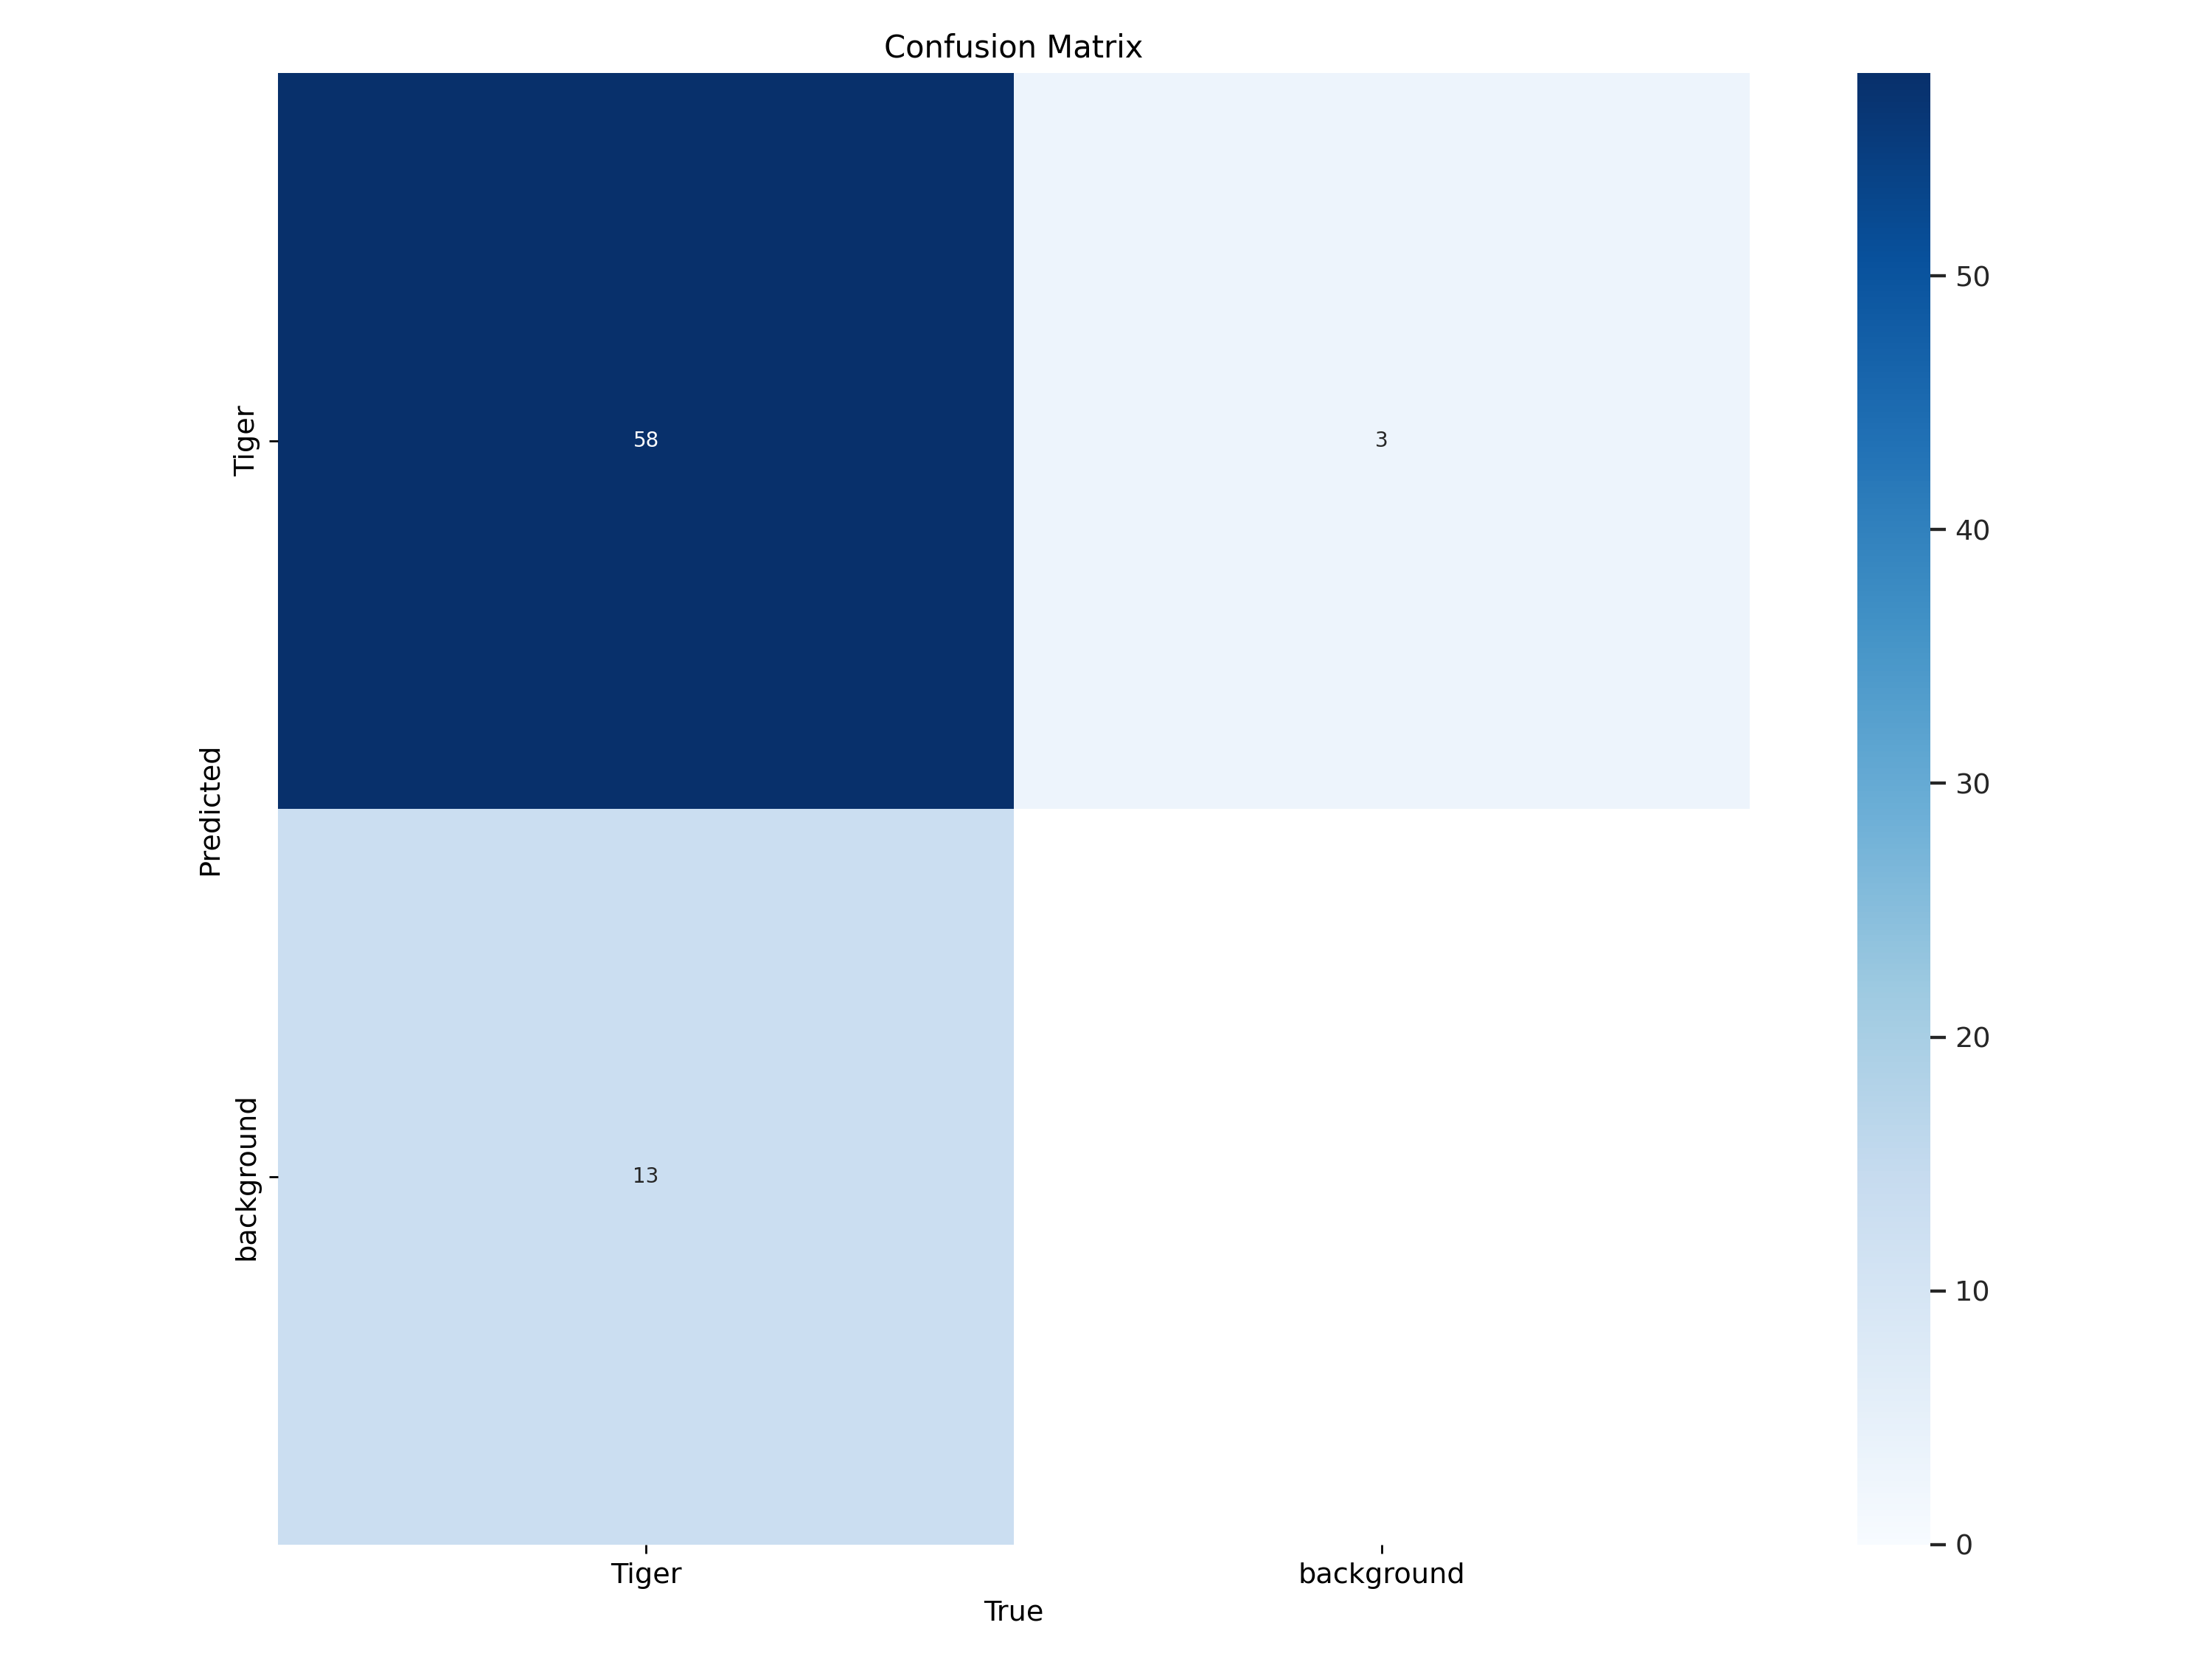

In [ ]:
Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=800)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
path = '/content/images/'
images = os.listdir(path)

for img in range(len(images)):
  image = f'{path}{images[img]}'
  results = model.predict(image)
  result = results[0]

  img_detective = Image.fromarray(result.plot()[:,:,::-1])
  # Сохранение изображения
  img_detective.save(f'detective_images/image_{img+1}.jpg')

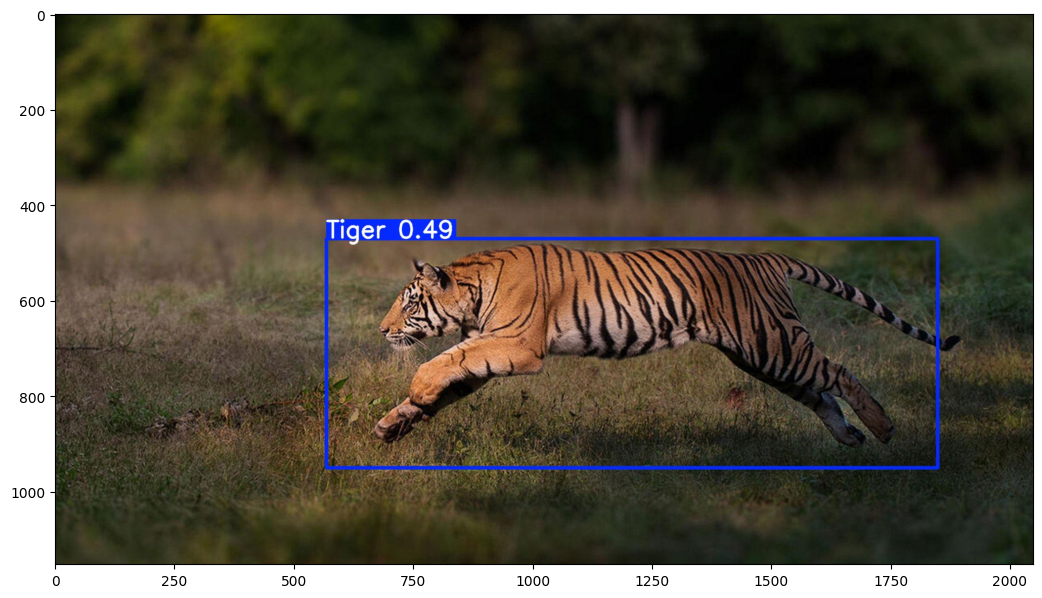

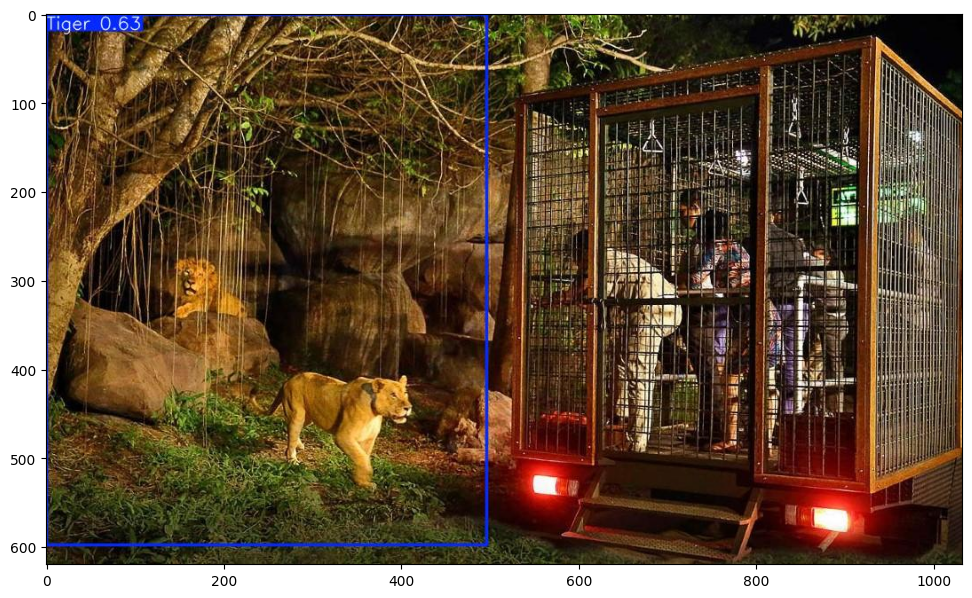

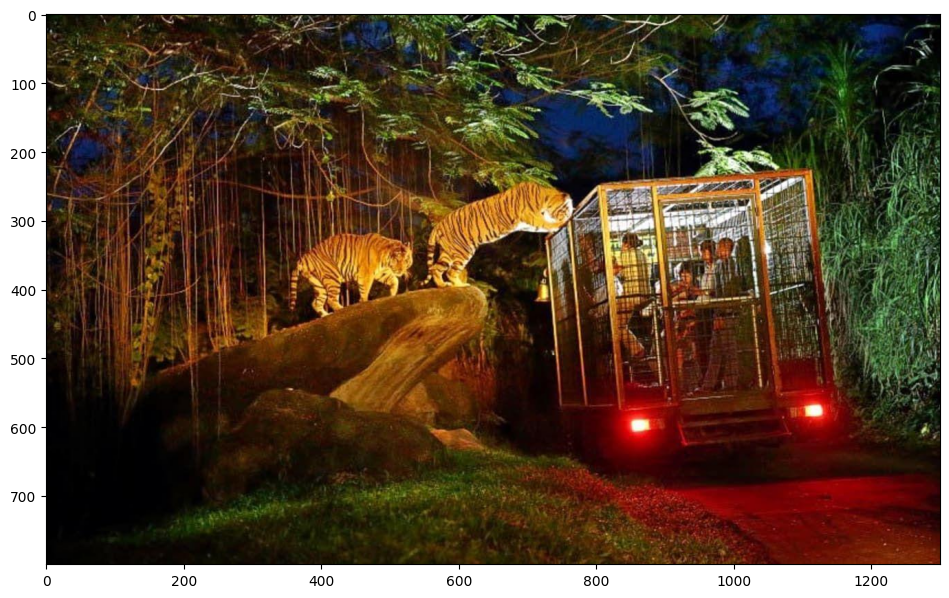

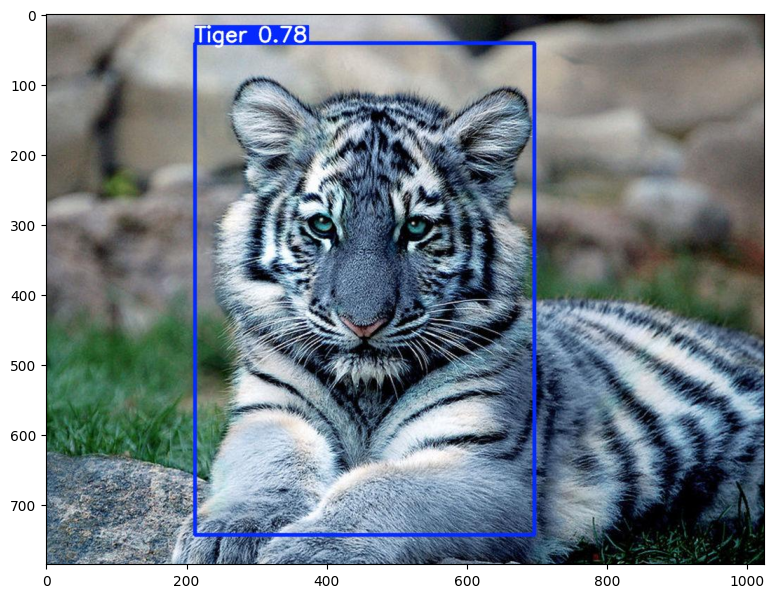

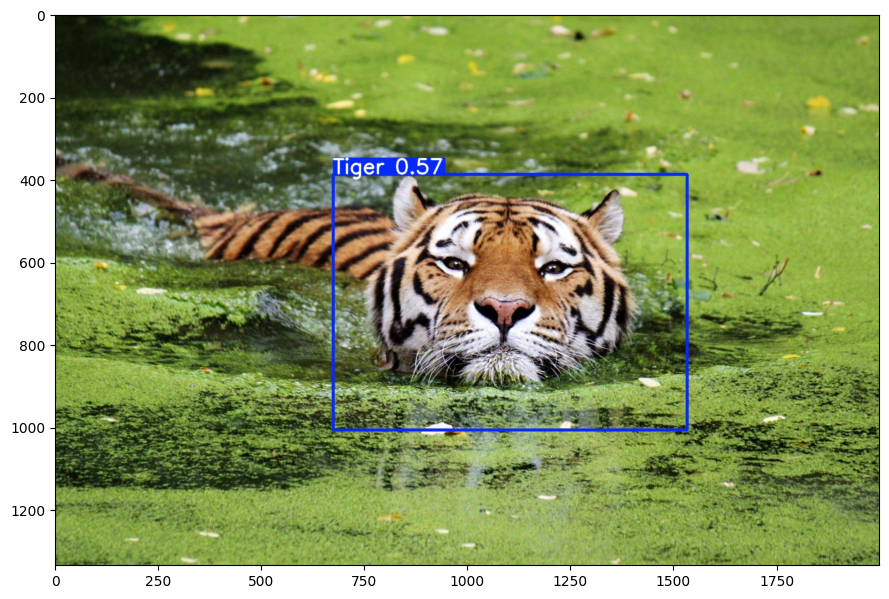

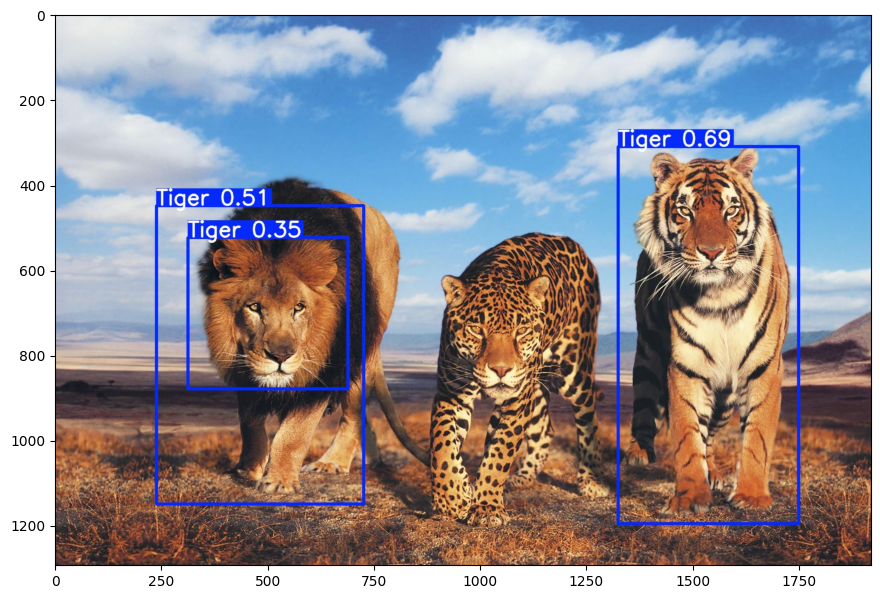

In [ ]:
path = 'detective_images/'
files = os.listdir(path)

for idx, img in enumerate(files):
  image = Image.open(f'{path}{img}')
  plt.figure(figsize=(20,50))
  plt.subplot(len(files), 1, 1)
  plt.imshow(image)
plt.show()

# Video

In [ ]:
from ultralytics import YOLO
import cv2
import math

In [ ]:
# object classes
classNames = ["Tiger", "person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

In [ ]:
# Путь к видеофайлу
video_path = 'tiger.mp4'  # Обновите этот путь в соответствии с вашим видеофайлом
cap = cv2.VideoCapture(video_path)

# Получение параметров видео для записи результата (если нужно)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) # количество кадров в секунду
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # 4-байтовый код, который используется для указания видеокодека

frame_number = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # количество кадров в видео
print('Number of frames in video:', frame_number)

# Сохранение видеофайла
out = cv2.VideoWriter('output_tiger.mp4', fourcc, fps, (width, height))

Number of frames in video: 330


In [ ]:
while True:
    success, img = cap.read()
    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            #confidence = math.ceil((box.conf[0]*100))/100
            #print("Confidence --->", confidence)

            # class name
            cls = int(box.cls[0])
            #print("Class name -->", classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    out.write(img)

cap.release()
out.release()
cv2.destroyAllWindows()